# Data Visualization for JAMSEC data: 

In [ ]:
# Data Explained:
## Each .tsv file is a cruise chopped into 10,000 sequential segments. 

In [ ]:
# Check to see how balanced the dataset is: 

In [107]:
# Read in the filename:

import pandas as pd
import re

fpath = 'JAMSTEC-part00000.tsv'

jamsec = []

with open(fpath) as f:
    Lines = f.readlines()
    for line in Lines: 
        line = line.strip()
        cols = line.split(" ")
        jamsec.append(cols)

    

In [108]:
cols = ["lon", "lat", "depth", "sigh", "sigd", "SID", "pred", "ID", "(pred-depth)/depth", "d10", 'd20', "d60", "age", "VGG", "rate", "sed", "roughness", "G:T", "NDP2.5m", "NDP5m", "NDP10m", "NDP30m", "STD2.5m", "STD5m", "STD10m", "STD30m", "MED2.5", "MED5m", "MED10m", "MED30m", "D-MED2.5m/STD2.5m", "D-MED5m/STD5m", "D-MED10m/STD10m", "D-MED30m/STD30m", "year", "kind"]
jamsec_df = pd.DataFrame(jamsec, columns=cols)


In [109]:
jamsec_df.head()

,lon,lat,depth,sigh,sigd,SID,pred,ID,(pred-depth)/depth,d10,...,MED2.5,MED5m,MED10m,MED30m,D-MED2.5m/STD2.5m,D-MED5m/STD5m,D-MED10m/STD10m,D-MED30m/STD30m,year,kind
0,143.63438,13.69385,-3840,0,9998,732,-3768,1,0.01875,0.841910827448,...,-146.834,-130.151,-239.782,-353.259,-1.32947,-1.10298,-1.71776,-1.48651,2010,M
1,143.63592,13.69378,-3838,0,9998,732,-3778,2,0.0156331,0.851565224962,...,-142.254,-128.33,-239.209,-352.362,-1.29926,-1.09212,-1.70016,-1.48549,2010,M
2,143.72245,13.69383,-3819,0,9998,732,-3789,3,0.00785546,0.97479694406,...,-41.4849,-200.027,-308.482,-379.145,-0.764249,-1.78157,-1.49589,-1.68298,2010,M
3,143.72467,13.69383,-3828,0,9998,732,-3800,4,0.00731452,0.973613649987,...,-47.3266,-217.508,-319.66,-388.872,-0.860299,-1.88628,-1.53997,-1.72586,2010,M
4,143.73005,13.69397,-3829,0,9998,732,-3819,5,0.00261165,0.970733921364,...,-52.8624,-240.776,-325.912,-391.46,-0.915904,-1.9523,-1.5462,-1.73595,2010,M


In [110]:
len(jamsec_df)

29260

In [111]:
# Remove SID, since cruise ID should not be used as a feature: 

In [112]:
# Count number of good vs. bad cruises, using sigd=9999 for false
jamsec_df.loc[(jamsec_df.sigd != "9999"), 'sigd'] = 1
jamsec_df.loc[(jamsec_df.sigd == "9999"), 'sigd'] = 0

In [113]:
jamsec_df.head(5)

,lon,lat,depth,sigh,sigd,SID,pred,ID,(pred-depth)/depth,d10,...,MED2.5,MED5m,MED10m,MED30m,D-MED2.5m/STD2.5m,D-MED5m/STD5m,D-MED10m/STD10m,D-MED30m/STD30m,year,kind
0,143.63438,13.69385,-3840,0,1,732,-3768,1,0.01875,0.841910827448,...,-146.834,-130.151,-239.782,-353.259,-1.32947,-1.10298,-1.71776,-1.48651,2010,M
1,143.63592,13.69378,-3838,0,1,732,-3778,2,0.0156331,0.851565224962,...,-142.254,-128.33,-239.209,-352.362,-1.29926,-1.09212,-1.70016,-1.48549,2010,M
2,143.72245,13.69383,-3819,0,1,732,-3789,3,0.00785546,0.97479694406,...,-41.4849,-200.027,-308.482,-379.145,-0.764249,-1.78157,-1.49589,-1.68298,2010,M
3,143.72467,13.69383,-3828,0,1,732,-3800,4,0.00731452,0.973613649987,...,-47.3266,-217.508,-319.66,-388.872,-0.860299,-1.88628,-1.53997,-1.72586,2010,M
4,143.73005,13.69397,-3829,0,1,732,-3819,5,0.00261165,0.970733921364,...,-52.8624,-240.776,-325.912,-391.46,-0.915904,-1.9523,-1.5462,-1.73595,2010,M


In [115]:
# Remove all non-numeric or irrelvant features: 
jamsec_df = jamsec_df.drop(columns=['SID', 'ID', 'kind'])

In [117]:
print(len(jamsec_df))
jamsec_df.head()

27289


,lon,lat,depth,sigh,sigd,pred,(pred-depth)/depth,d10,d20,d60,...,STD30m,MED2.5,MED5m,MED10m,MED30m,D-MED2.5m/STD2.5m,D-MED5m/STD5m,D-MED10m/STD10m,D-MED30m/STD30m,year
0,143.63438,13.69385,-3840,0,1,-3768,0.018750,0.841911,0.859022,0.858573,...,237.642800,-146.8340,-130.151,-239.782,-353.259,-1.329470,-1.10298,-1.71776,-1.48651,2010
1,143.63592,13.69378,-3838,0,1,-3778,0.015633,0.851565,0.863302,0.858939,...,237.202723,-142.2540,-128.330,-239.209,-352.362,-1.299260,-1.09212,-1.70016,-1.48549,2010
2,143.72245,13.69383,-3819,0,1,-3789,0.007855,0.974797,0.971159,0.897158,...,225.281409,-41.4849,-200.027,-308.482,-379.145,-0.764249,-1.78157,-1.49589,-1.68298,2010
3,143.72467,13.69383,-3828,0,1,-3800,0.007315,0.973614,0.971235,0.898353,...,225.320110,-47.3266,-217.508,-319.660,-388.872,-0.860299,-1.88628,-1.53997,-1.72586,2010
4,143.73005,13.69397,-3829,0,1,-3819,0.002612,0.970734,0.971165,0.901054,...,225.501848,-52.8624,-240.776,-325.912,-391.460,-0.915904,-1.95230,-1.54620,-1.73595,2010


In [118]:
# Convert all columns to float: 
new_cols = jamsec_df.columns
for c in new_cols: 
    jamsec_df = jamsec_df[~jamsec_df[c].isin(["NaN"])]
    jamsec_df[c] = pd.to_numeric(jamsec_df[c])

In [120]:
#jamsec_df = jamsec_df.dropna()
print(len(jamsec_df))
jamsec_df.head()

27289


,lon,lat,depth,sigh,sigd,pred,(pred-depth)/depth,d10,d20,d60,...,STD30m,MED2.5,MED5m,MED10m,MED30m,D-MED2.5m/STD2.5m,D-MED5m/STD5m,D-MED10m/STD10m,D-MED30m/STD30m,year
0,143.63438,13.69385,-3840,0,1,-3768,0.018750,0.841911,0.859022,0.858573,...,237.642800,-146.8340,-130.151,-239.782,-353.259,-1.329470,-1.10298,-1.71776,-1.48651,2010
1,143.63592,13.69378,-3838,0,1,-3778,0.015633,0.851565,0.863302,0.858939,...,237.202723,-142.2540,-128.330,-239.209,-352.362,-1.299260,-1.09212,-1.70016,-1.48549,2010
2,143.72245,13.69383,-3819,0,1,-3789,0.007855,0.974797,0.971159,0.897158,...,225.281409,-41.4849,-200.027,-308.482,-379.145,-0.764249,-1.78157,-1.49589,-1.68298,2010
3,143.72467,13.69383,-3828,0,1,-3800,0.007315,0.973614,0.971235,0.898353,...,225.320110,-47.3266,-217.508,-319.660,-388.872,-0.860299,-1.88628,-1.53997,-1.72586,2010
4,143.73005,13.69397,-3829,0,1,-3819,0.002612,0.970734,0.971165,0.901054,...,225.501848,-52.8624,-240.776,-325.912,-391.460,-0.915904,-1.95230,-1.54620,-1.73595,2010


In [92]:
#import numpy as np
#jamsec_df = np.where(jamsec_df.values >= np.finfo(np.float64).max)

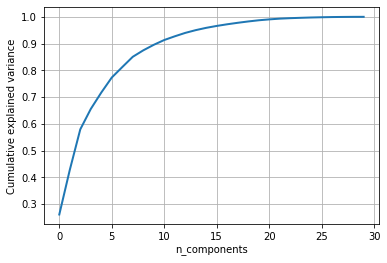

In [124]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn import decomposition 

pca = decomposition.PCA()

# Scale the data first 
df_transform = StandardScaler().fit_transform(jamsec_df)
pca = PCA(n_components = 30).fit(df_transform)
new_df = pca.transform(df_transform)

p_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(p_var_explained)

plt.figure(1, figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative explained variance')
plt.show()